# Task 2 — Exploratory Data Analysis (EDA)

Dataset: `supermarket_sales.csv`

This notebook contains a step-by-step EDA template: data loading, structure checks, missing values, univariate and bivariate analysis, correlation analysis, group-by insights, and handling skew/outliers.


In [5]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


df = pd.read_csv('Downloads/Task 2 EDA/supermarket_sales.csv')
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
# Quick checks
print('Shape:', df.shape)
print('\nData types:')
print(df.dtypes)
print('\nMissing values:')
print(df.isnull().sum())
df.describe(include='all')


Shape: (1000, 17)

Data types:
Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

Missing values:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                    

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,849-09-3807,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,14:42,Ewallet,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,NaN,307.58738,4.761905,15.379369,6.97270
std,NaN,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,NaN,NaN,234.17651,0.000000,11.708825,1.71858
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,NaN,10.17000,4.761905,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,NaN,118.49750,4.761905,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,NaN,NaN,241.76000,4.761905,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,NaN,NaN,448.90500,4.761905,22.445250,8.50000


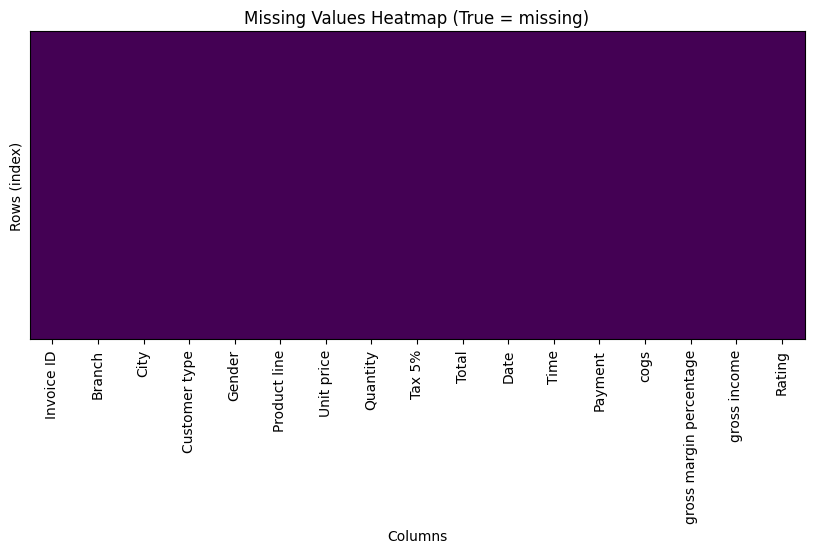

In [7]:
# Missing values heatmap (matplotlib)
plt.figure(figsize=(10,4))
plt.title('Missing Values Heatmap (True = missing)')
plt.imshow(df.isnull(), aspect='auto', interpolation='none')
plt.xlabel('Columns')
plt.ylabel('Rows (index)')
plt.xticks(ticks=np.arange(len(df.columns)), labels=df.columns, rotation=90)
plt.yticks([])
plt.show()

In [8]:
# Univariate analysis (numeric)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols[:5]  # show first few numeric columns to analyze

['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs']

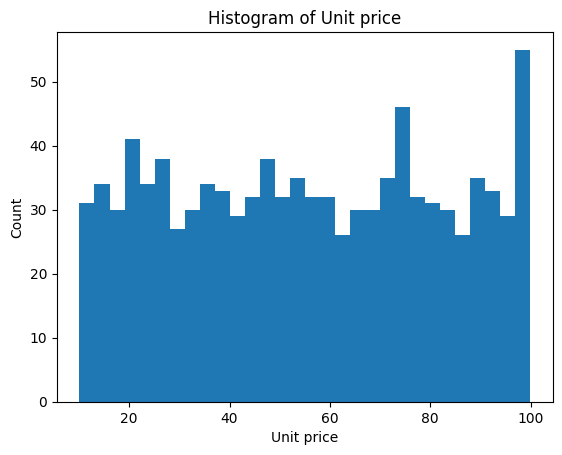

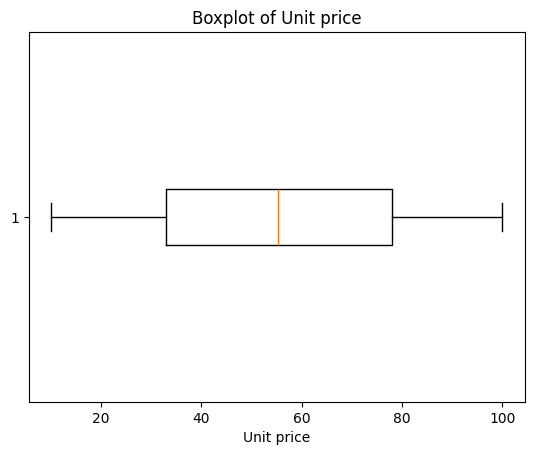

In [13]:
# Example histogram and boxplot for a numeric column
col = num_cols[0]  # change as needed
plt.figure(); plt.hist(df[col].dropna(), bins=30); plt.title(f'Histogram of {col}'); plt.xlabel(col); plt.ylabel('Count'); plt.show()
plt.figure(); plt.boxplot(df[col].dropna(), vert=False); plt.title(f'Boxplot of {col}'); plt.xlabel(col); plt.show()

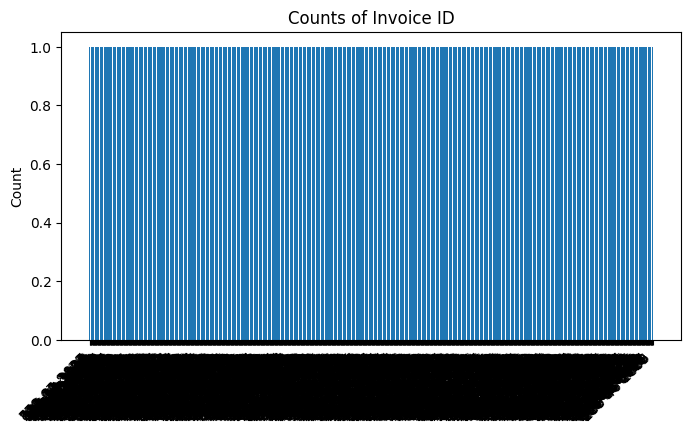

In [20]:
# Categorical counts (bar chart)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols[5]
# Example: choose a categorical column
cat = cat_cols[0]
counts = df[cat].value_counts()
plt.figure(figsize=(8,4)); plt.bar(counts.index.astype(str), counts.values); plt.xticks(rotation=45, ha='right'); plt.title(f'Counts of {cat}'); plt.ylabel('Count'); plt.show()

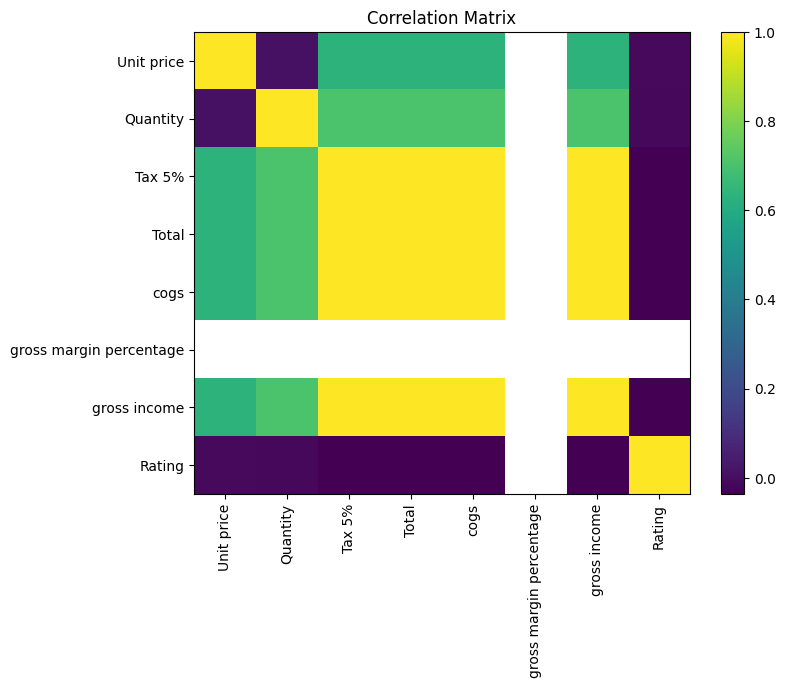

In [21]:
# Correlation heatmap for numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[num_cols].corr()
plt.figure(figsize=(8,6)); plt.imshow(corr, aspect='auto', interpolation='none'); plt.colorbar(); plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns, rotation=90); plt.yticks(ticks=np.arange(len(corr.index)), labels=corr.index); plt.title('Correlation Matrix'); plt.show()

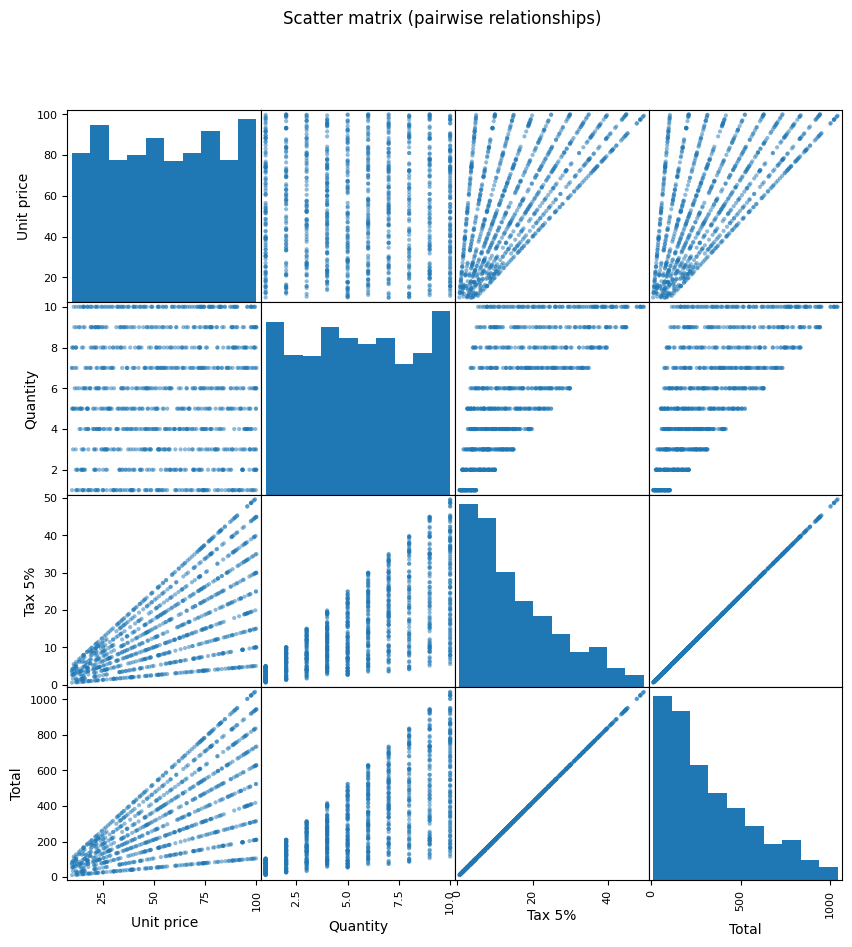

In [22]:
# Scatter matrix (pairwise)
from pandas.plotting import scatter_matrix
cols = num_cols[:4]  # adjust as required
scatter_matrix(df[cols].dropna(), diagonal='hist', figsize=(10,10))
plt.suptitle('Scatter matrix (pairwise relationships)')
plt.show()

Branch
A    18625.49
C    18567.76
B    18478.88
Name: Unit price, dtype: float64


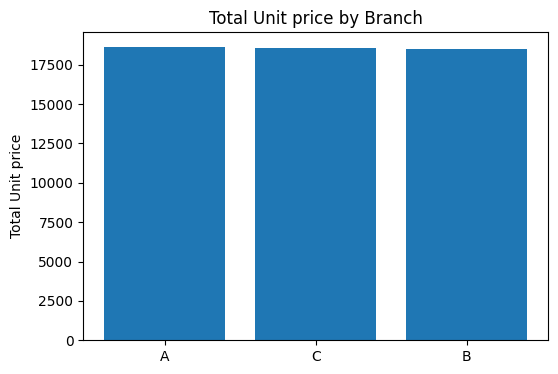

In [23]:
# Group-by examples
# Total of first numeric column by branch (if branch exists)
branch_col = None
for c in df.columns:
    if c.lower() == 'branch':
        branch_col = c
        break

if branch_col:
    col = num_cols[0]
    grouped = df.groupby(branch_col)[col].sum().sort_values(ascending=False)
    print(grouped)
    plt.figure(figsize=(6,4)); plt.bar(grouped.index.astype(str), grouped.values); plt.title(f'Total {col} by {branch_col}'); plt.ylabel(f'Total {col}'); plt.show()
else:
    print('No branch column found in dataset')

Skewness before: 0.007077447853328846
Skewness after log1p: -0.7275886087800806


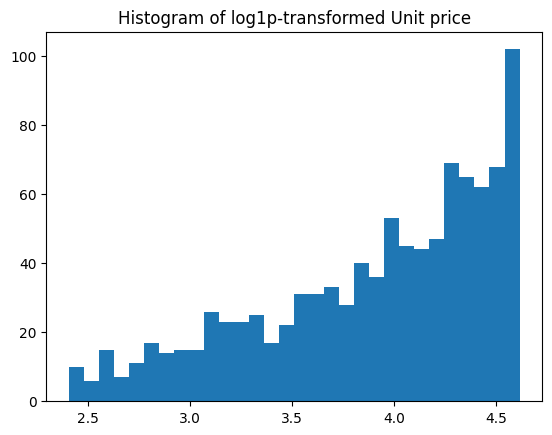

In [24]:
# Skewness and log-transform example
col = num_cols[0]
print('Skewness before:', df[col].dropna().skew())
df['log1p_' + col] = np.log1p(df[col].clip(lower=0).fillna(0))
print('Skewness after log1p:', df['log1p_' + col].dropna().skew())
plt.figure(); plt.hist(df['log1p_' + col].dropna(), bins=30); plt.title('Histogram of log1p-transformed ' + col); plt.show()